In [3]:
#importing libraries
!pip install pingouin
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import scipy.stats as stats
import statsmodels.formula.api as smf
import pingouin as pg
from collections import Counter

In [6]:
#importing the dataset
from google.colab import files
uploaded = files.upload()
beedata = pd.read_csv('BeeData.csv')

Saving BeeData.csv to BeeData.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'BeeData.csv' is in your Google Drive under 'My Drive'
file_path = '/content/beedata.csv'
# Changed beedata.csv to file_path in pd.read_csv
beedata = pd.read_csv(file_path)

KeyboardInterrupt: 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'BeeData.csv' is in your Google Drive under 'My Drive'
file_path = '/content/beedata.csv'
# Changed beedata.csv to file_path in pd.read_csv
beedata = pd.read_csv(file_path)

MessageError: Error: credential propagation was unsuccessful

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

# Assuming 'BeeData.csv' is in your Google Drive under 'My Drive'
file_path = '/content/drive/MyDrive/beedata.csv'
beedata = pd.read_csv(file_path)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
beedata.head()

,State,Year,Quarter,Colonies at BQ,Max Colonies,Lost Colonies,Percent Lost,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites,Others pests/parasites,Disease,Pesticides,Other,Unknown
0,Alabama,2015,1,7000,7000,1800,0.26,2800,250,0.04,0.100,0.054,0.005,0.022,0.091,0.094
1,Alabama,2016,1,7500,7500,1700,0.23,2100,90,0.01,0.242,0.220,0.043,0.081,0.024,0.113
2,Alabama,2017,1,7000,7000,1600,0.23,570,740,0.11,0.199,0.098,0.002,0.032,0.067,0.093
3,Alabama,2018,1,7500,7500,820,0.11,1200,1500,0.20,0.292,0.302,0.019,0.149,0.086,0.045
4,Alabama,2019,1,5500,5500,650,0.12,800,200,0.04,0.272,0.227,0.018,0.003,0.031,0.090


In [7]:
#Taking the sum of the two colonies
beedata['New_Col'] = beedata[['Colonies at BQ', 'Added Colonies']].sum(axis= 1)


In [8]:
#Looking at the first 5 obs of all data
beedata.head()
#Subtracting the new column from lost colonies
beedata['New_Col'] = beedata['New_Col']-beedata['Lost Colonies']

In [9]:
beedata.head()

,State,Year,Quarter,Colonies at BQ,Max Colonies,Lost Colonies,Percent Lost,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites,Others pests/parasites,Disease,Pesticides,Other,Unknown,New_Col
0,Alabama,2015,1,7000,7000,1800,0.26,2800,250,0.04,0.100,0.054,0.005,0.022,0.091,0.094,8000
1,Alabama,2016,1,7500,7500,1700,0.23,2100,90,0.01,0.242,0.220,0.043,0.081,0.024,0.113,7900
2,Alabama,2017,1,7000,7000,1600,0.23,570,740,0.11,0.199,0.098,0.002,0.032,0.067,0.093,5970
3,Alabama,2018,1,7500,7500,820,0.11,1200,1500,0.20,0.292,0.302,0.019,0.149,0.086,0.045,7880
4,Alabama,2019,1,5500,5500,650,0.12,800,200,0.04,0.272,0.227,0.018,0.003,0.031,0.090,5650


In [10]:
# make quarter fixed factor

beedata['Quarter']= pd.Categorical(beedata['Quarter'])
beedata['State']= pd.Categorical(beedata['State'])
beedata['State'].dtype

CategoricalDtype(categories=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
                  'Connecticut', 'Florida', 'Georgia', 'Idaho', 'Illinois',
                  'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
                  'Maine', 'Maryland', 'Massachusetts', 'Michigan',
                  'Minnesota', 'Mississippi', 'Missouri', 'Montana',
                  'Nebraska', 'New Jersey', 'New Mexico', 'New York',
                  'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
                  'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota',
                  'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
                  'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [11]:
#Separating Quarters
Q1 = beedata[beedata['Quarter']==1]
Q2 = beedata[beedata['Quarter']==2]
Q3 = beedata[beedata['Quarter']== 3]
Q4 = beedata[beedata['Quarter']==4]

#Creating an alpha
alpha = 0.05

#Getting all data points excluding Quarter
data = beedata.columns[2:]

for colonies in data:
  colonies_Q1 = Q1[colonies]
  colonies_Q2 = Q2[colonies]
  colonies_Q3 = Q3[colonies]
  colonies_Q4 = Q4[colonies]

  #Performing f-Stat ANOVA Test
  from scipy.stats import f_oneway
  f_stat, p_value = f_oneway(colonies_Q1,colonies_Q2,colonies_Q3,colonies_Q4)
  #Storing data
  results = {}
  results[colonies] = {
      'F-Statistic': f_stat,
      'p-value': p_value,
      'Significant': p_value < alpha

  }

  #Displaying results
  for colonies, result in results.items():
    print(f"{colonies}:")
    print(f"F-Statistic: {result['F-Statistic']}")
    print(f"p-value: {result['p-value']}")
    if result['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)


Quarter:
F-Statistic: inf
p-value: 0.0
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ:
F-Statistic: 0.22784971291821882
p-value: 0.8770507743260569
There are no statistical differences between quarters
--------------------------------------------------
Max Colonies:
F-Statistic: 0.3632322884270413
p-value: 0.7795691465089857
There are no statistical differences between quarters
--------------------------------------------------
Lost Colonies:
F-Statistic: 0.4660263110463411
p-value: 0.7060252742816189
There are no statistical differences between quarters
--------------------------------------------------
Percent Lost:
F-Statistic: 26.91680782787077
p-value: 5.4667334900040244e-17
There are statistical differences between quarters
--------------------------------------------------
Added Colonies:
F-Statistic: 17.24644511038505
p-value: 5.018772795909255e-11
There are statistical differences between quarters
----------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
###checking counts
stressors = ['Varroa Mites', 'Others pests/parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']

print("📊 Non-zero counts by quarter for each stressor:")

for var in stressors:
    q1_count = (Q1[var] > 0).sum()
    q2_count = (Q2[var] > 0).sum()
    q3_count = (Q3[var] > 0).sum()
    q4_count = (Q4[var] > 0).sum()

    print(f"{var}: Q1 = {q1_count}, Q2 = {q2_count}, Q3 = {q3_count}, Q4 = {q4_count}")

📊 Non-zero counts by quarter for each stressor:
Varroa Mites: Q1 = 440, Q2 = 396, Q3 = 395, Q4 = 396
Others pests/parasites: Q1 = 401, Q2 = 383, Q3 = 391, Q4 = 390
Disease: Q1 = 360, Q2 = 368, Q3 = 377, Q4 = 353
Pesticides: Q1 = 352, Q2 = 366, Q3 = 370, Q4 = 355
Other: Q1 = 432, Q2 = 392, Q3 = 394, Q4 = 392
Unknown: Q1 = 431, Q2 = 381, Q3 = 386, Q4 = 387


In [13]:
#Perfoming Levene's test for equal variance
#importing levene's test
alpha = 0.01
data = beedata.columns[2:]
from scipy.stats import levene
for colonies in data:
  colonies_Q1 = Q1[colonies]
  colonies_Q2 = Q2[colonies]
  colonies_Q3 = Q3[colonies]
  colonies_Q4 = Q4[colonies]
  f_stat_levene,p_value_levene = scipy.stats.levene(colonies_Q1,colonies_Q2,colonies_Q3,colonies_Q4)


  #Performing f-Stat Levene's test

  #Storing data
  results1 = {}
  results1[colonies] = {
      'F-Statistic': f_stat_levene,
      'p-value': p_value_levene,
      'Significant': p_value_levene < alpha

  }
#Displaying results
for colonies, result1 in results1.items():
    print(f"F-Statistic: {result1['F-Statistic']}")
    print(f"p-value: {result1['p-value']}")
    if result['Significant']:
        print("There are statistical differences between quarters")
    else:
        print("There are no statistical differences between quarters")
    print("-" * 50)


F-Statistic: 0.13841117499094394
p-value: 0.9370623289995669
There are no statistical differences between quarters
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:3057: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [14]:
#perfoming Manwhitney test to see if there are significant means between groups 1 and 2

from scipy.stats import mannwhitneyu
alpha = 0.05
Q1 = beedata[beedata['Quarter']==1]
Q2 = beedata[beedata['Quarter']==2]

data = beedata.columns[2:]

results2 = {}
for colonies in data:
  cononies_Q1_1 = Q1[colonies]
  colonies_Q2_1 = Q2[colonies]
  u_stat, p_value_2 = mannwhitneyu(cononies_Q1_1,colonies_Q2_1)
  #Storing results
  results2 [colonies] = {
      'Mann-Whitney U': u_stat,
      'p-value': p_value_2,
      'Significant':p_value_2 < alpha
  }
#Displaying Results
  for colonies, result2 in results2.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result2['Mann-Whitney U']}")
    print(f"p-value:{result2['p-value']}")
    if result2 ['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)



Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 81333.0
p-value:0.09690179732027987
There are no statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 81333.0
p-value:0.09690179732027987
There are no statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 75859.5
p-value:0.0012369197884684847
There are statistical differences between quarters
--------------------------------------------------
Q

In [15]:
#Mann-Whitney for groups Q3 and Q4
alpha = 0.05
Q3 = beedata[beedata['Quarter']==3]
Q4 = beedata[beedata['Quarter']==4]

data = beedata.columns[2:]

results3 = {}
for colonies in data:
  colonies_Q3_3 = Q3[colonies]
  colonies_Q4_3 = Q4[colonies]
  u_stat_3, p_value_3 = mannwhitneyu(colonies_Q3_3,colonies_Q4_3)
  results3 [colonies] = {
      'Mann-Whitney U': u_stat_3,
      'p-value': p_value_3,
      'Significant':p_value_3 < alpha
  }
  for colonies, result3 in results3.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result3['Mann-Whitney U']}")
    print(f"p-value:{result3['p-value']}")
    if result3 ['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)


Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 82359.5
p-value:0.21965095882226793
There are no statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 82359.5
p-value:0.21965095882226793
There are no statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 79811.5
p-value:0.6629328280528262
There are no statistical differences between quarters
--------------------------------------------------
Quar

In [16]:
#mann whitney group Q2 and Q3

alpha = 0.05
Q2 = beedata[beedata['Quarter']==2]
Q3 = beedata[beedata['Quarter']==3]

data = beedata.columns[2:]

results2and3 = {}
for colonies in data:
  colonies_Q2_2 = Q2[colonies]
  colonies_Q3_3 = Q3[colonies]
  u_stat_2and3, p_value_2and3 = mannwhitneyu(colonies_Q2_2,colonies_Q3_3)
  results2and3 [colonies] = {
  'Mann-Whitney U': u_stat_2and3,
  'p-value': p_value_2and3,
  'Significant':p_value_2and3 < alpha
}
  for colonies, result2and3 in results2and3.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result2and3['Mann-Whitney U']}")
    print(f"p-value:{result2and3['p-value']}")
    if result2and3['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)


Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 65953.0
p-value:0.00010915240086392283
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 65953.0
p-value:0.00010915240086392283
There are statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 77909.0
p-value:0.8769261747260293
There are no statistical differences between quarters
--------------------------------------------------
Quar

In [17]:
# Mann Whitney for Q2 and Q4
alpha = 0.05
Q2 = beedata[beedata['Quarter']==2]
Q4 = beedata[beedata['Quarter']==4]

data = beedata.columns[2:]

results4 = {}
for colonies in data:
  colonies_Q2_2 = Q2[colonies]
  colonies_Q4_4 = Q4[colonies]
  u_stat_4, p_value_4 = mannwhitneyu(colonies_Q2_2,colonies_Q4_4)
  results4 [colonies] = {
      'Mann-Whitney U': u_stat_4,
      'p-value': p_value_4,
      'Significant':p_value_4 < alpha
  }
  for colonies, result4 in results4.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result4['Mann-Whitney U']}")
    print(f"p-value:{result4['p-value']}")
    if result4 ['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)


Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 70096.5
p-value:0.009822140146738089
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:4.909421263145562e-174
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 70096.5
p-value:0.009822140146738089
There are statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 79382.0
p-value:0.7623205290470014
There are no statistical differences between quarters
--------------------------------------------------
Quarter


In [18]:
# mann whitney for groups 1 and 3

alpha = 0.05
Q1 = beedata[beedata['Quarter']==1]
Q3 = beedata[beedata['Quarter']==3]

data = beedata.columns[2:]

results1and3 = {}
for colonies in data:
  colonies_Q1_1 = Q1[colonies]
  colonies_Q3_3 = Q3[colonies]
  u_stat_1and3, p_value_1and3 = mannwhitneyu(colonies_Q1_1,colonies_Q3_3)
  results1and3 [colonies] = {
  'Mann-Whitney U': u_stat_1and3,
  'p-value': p_value_1and3,
  'Significant':p_value_1and3 < alpha
}
  for colonies, result1and3 in results1and3.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result1and3['Mann-Whitney U']}")
    print(f"p-value:{result1and3['p-value']}")
    if result1and3['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)



Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 68066.5
p-value:4.605464040519217e-08
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:1.3326490325051496e-183
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 68066.5
p-value:4.605464040519217e-08
There are statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 75395.0
p-value:0.0007696562540102334
There are statistical differences between quarters
--------------------------------------------------
Qua

In [19]:
# mann whitney for groups 1 and 4


alpha = 0.05
Q1 = beedata[beedata['Quarter']==1]
Q4 = beedata[beedata['Quarter']==4]

data = beedata.columns[2:]

results1and4 = {}
for colonies in data:
  colonies_Q1_1 = Q1[colonies]
  colonies_Q4_4 = Q4[colonies]
  u_stat_1and4, p_value_1and4 = mannwhitneyu(colonies_Q1_1,colonies_Q4_4)
  results1and4 [colonies] = {
  'Mann-Whitney U': u_stat_1and4,
  'p-value': p_value_1and4,
  'Significant':p_value_1and4 < alpha
}
  for colonies, result1and4 in results1and4.items():
    print(f"{colonies}")
    print(f"Mann-Whitney U: {result1and4['Mann-Whitney U']}")
    print(f"p-value:{result2and3['p-value']}")
    if result1and4['Significant']:
      print("There are statistical differences between quarters")
    else:
      print("There are no statistical differences between quarters")
    print("-"*50)

Quarter
Mann-Whitney U: 0.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 72564.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney U: 0.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Colonies at BQ
Mann-Whitney U: 72564.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Max Colonies
Mann-Whitney U: 77062.0
p-value:0.41242859308238156
There are statistical differences between quarters
--------------------------------------------------
Quarter
Mann-Whitney 

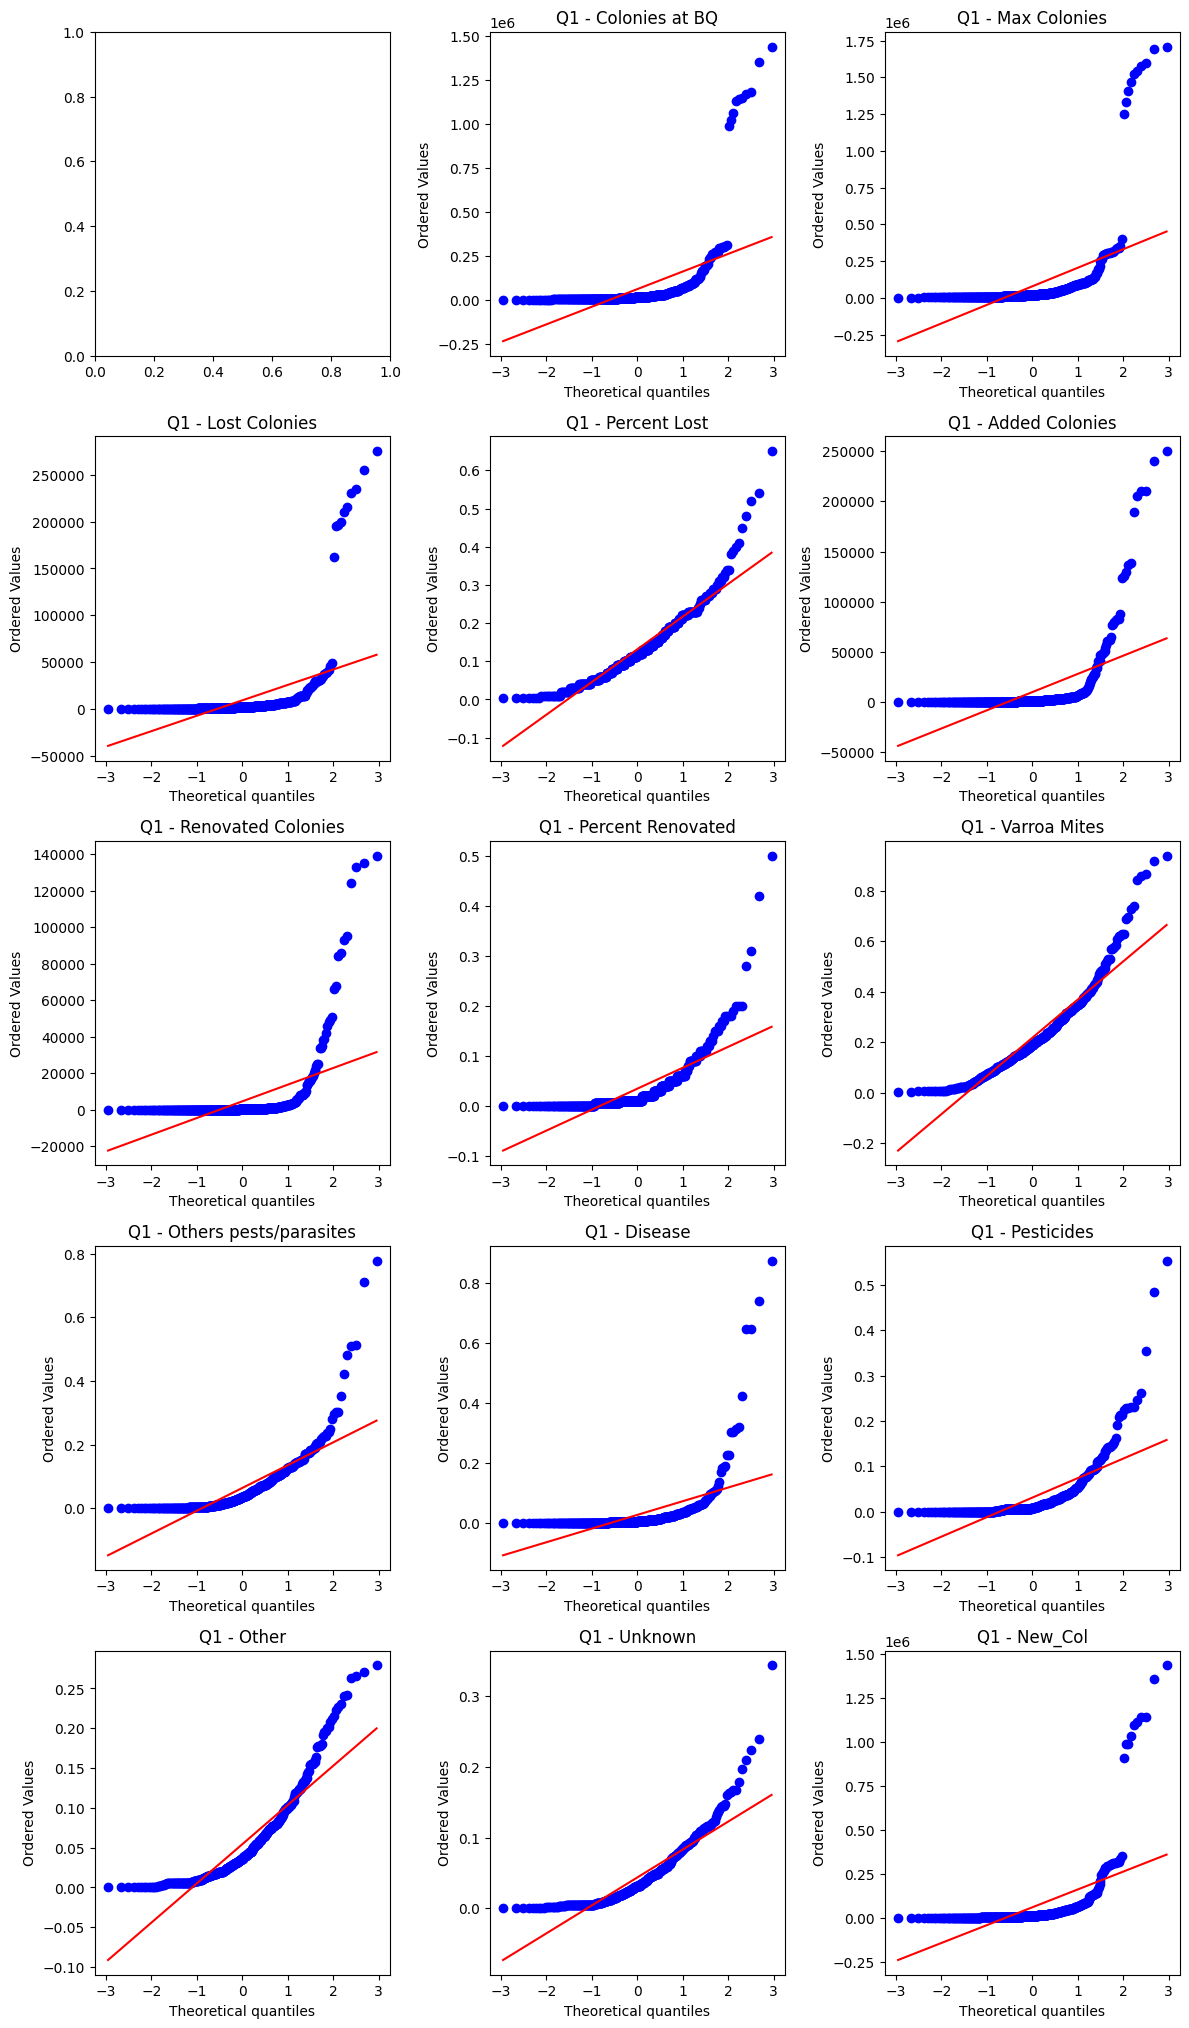

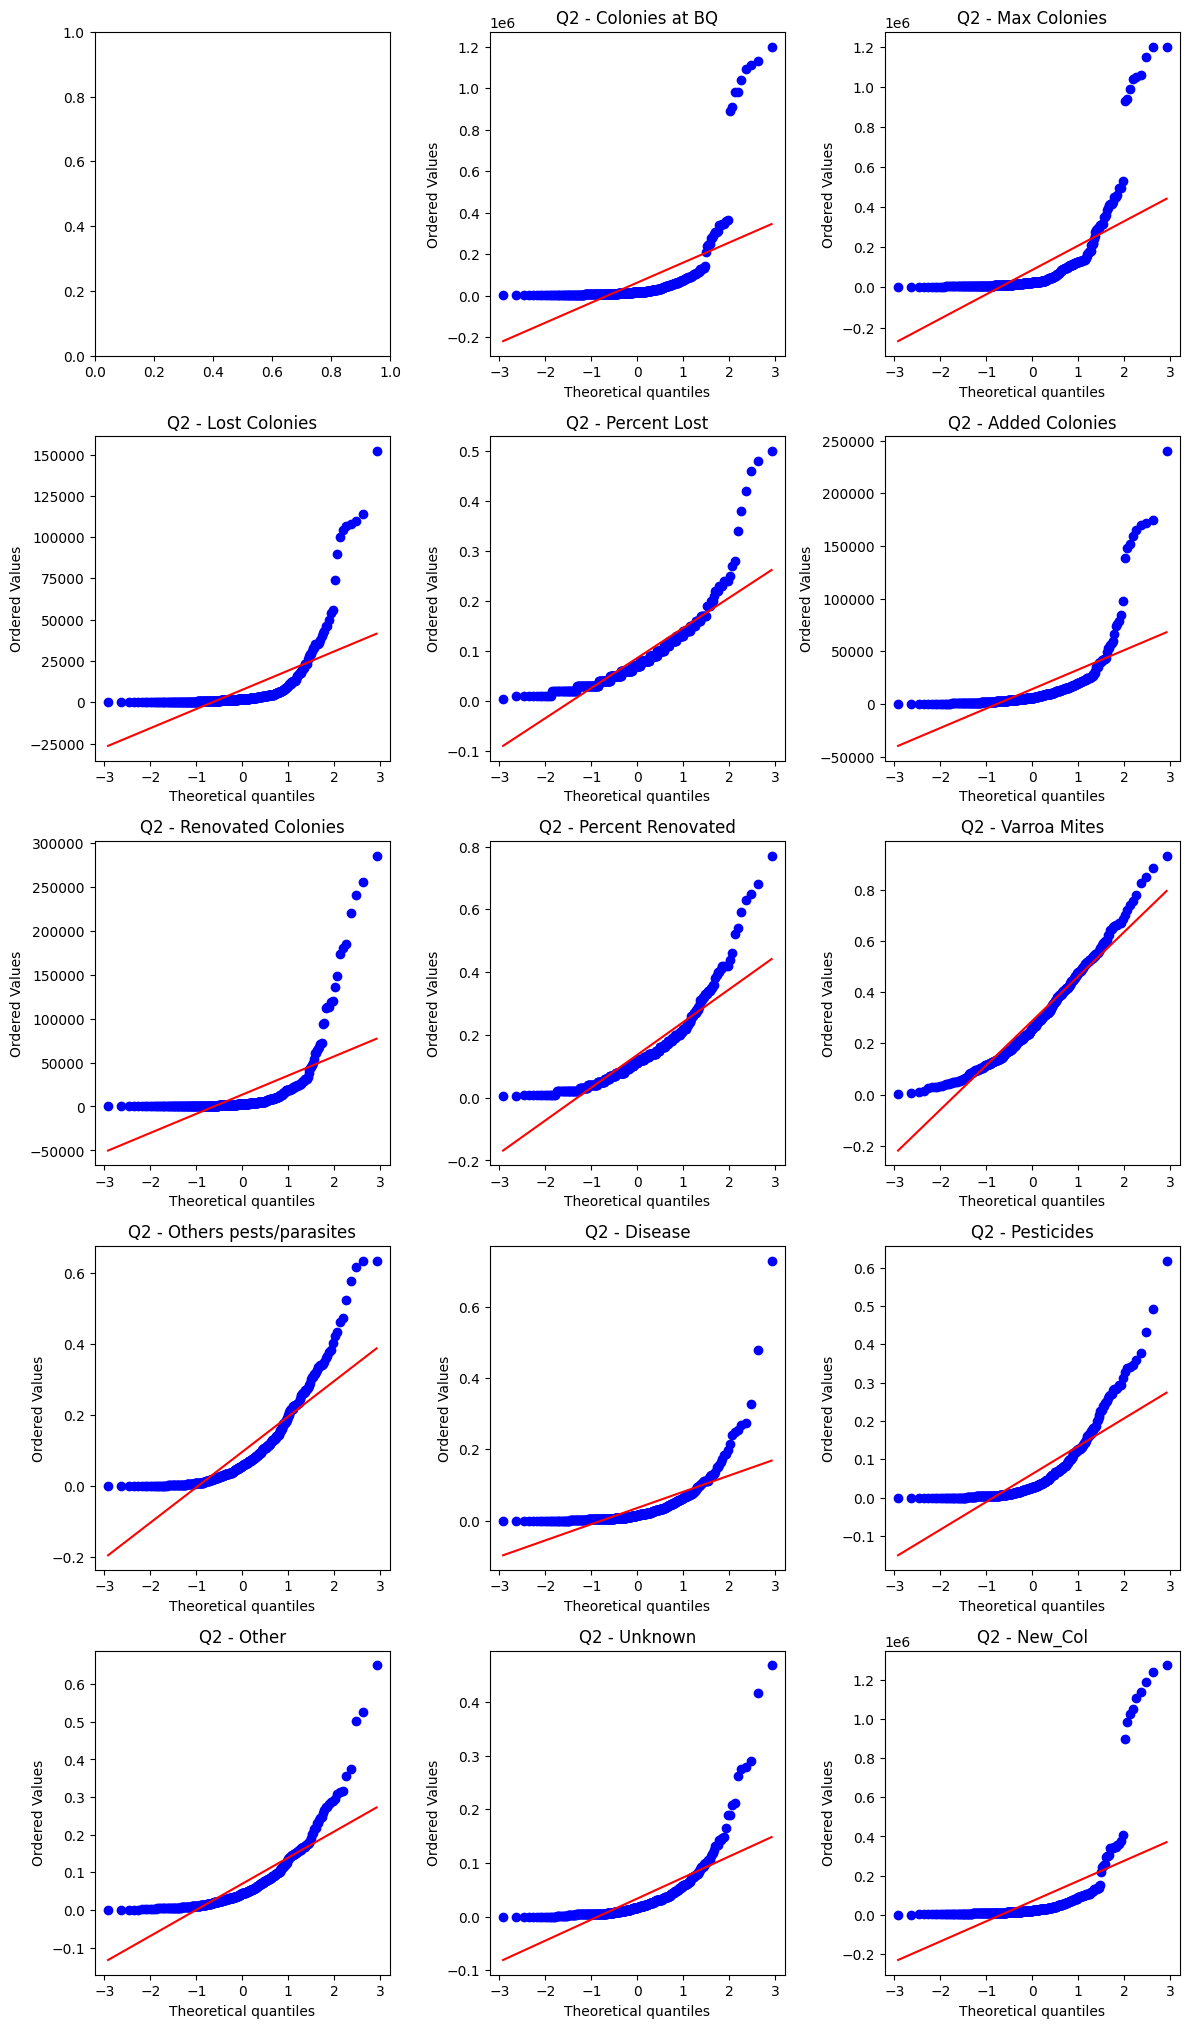

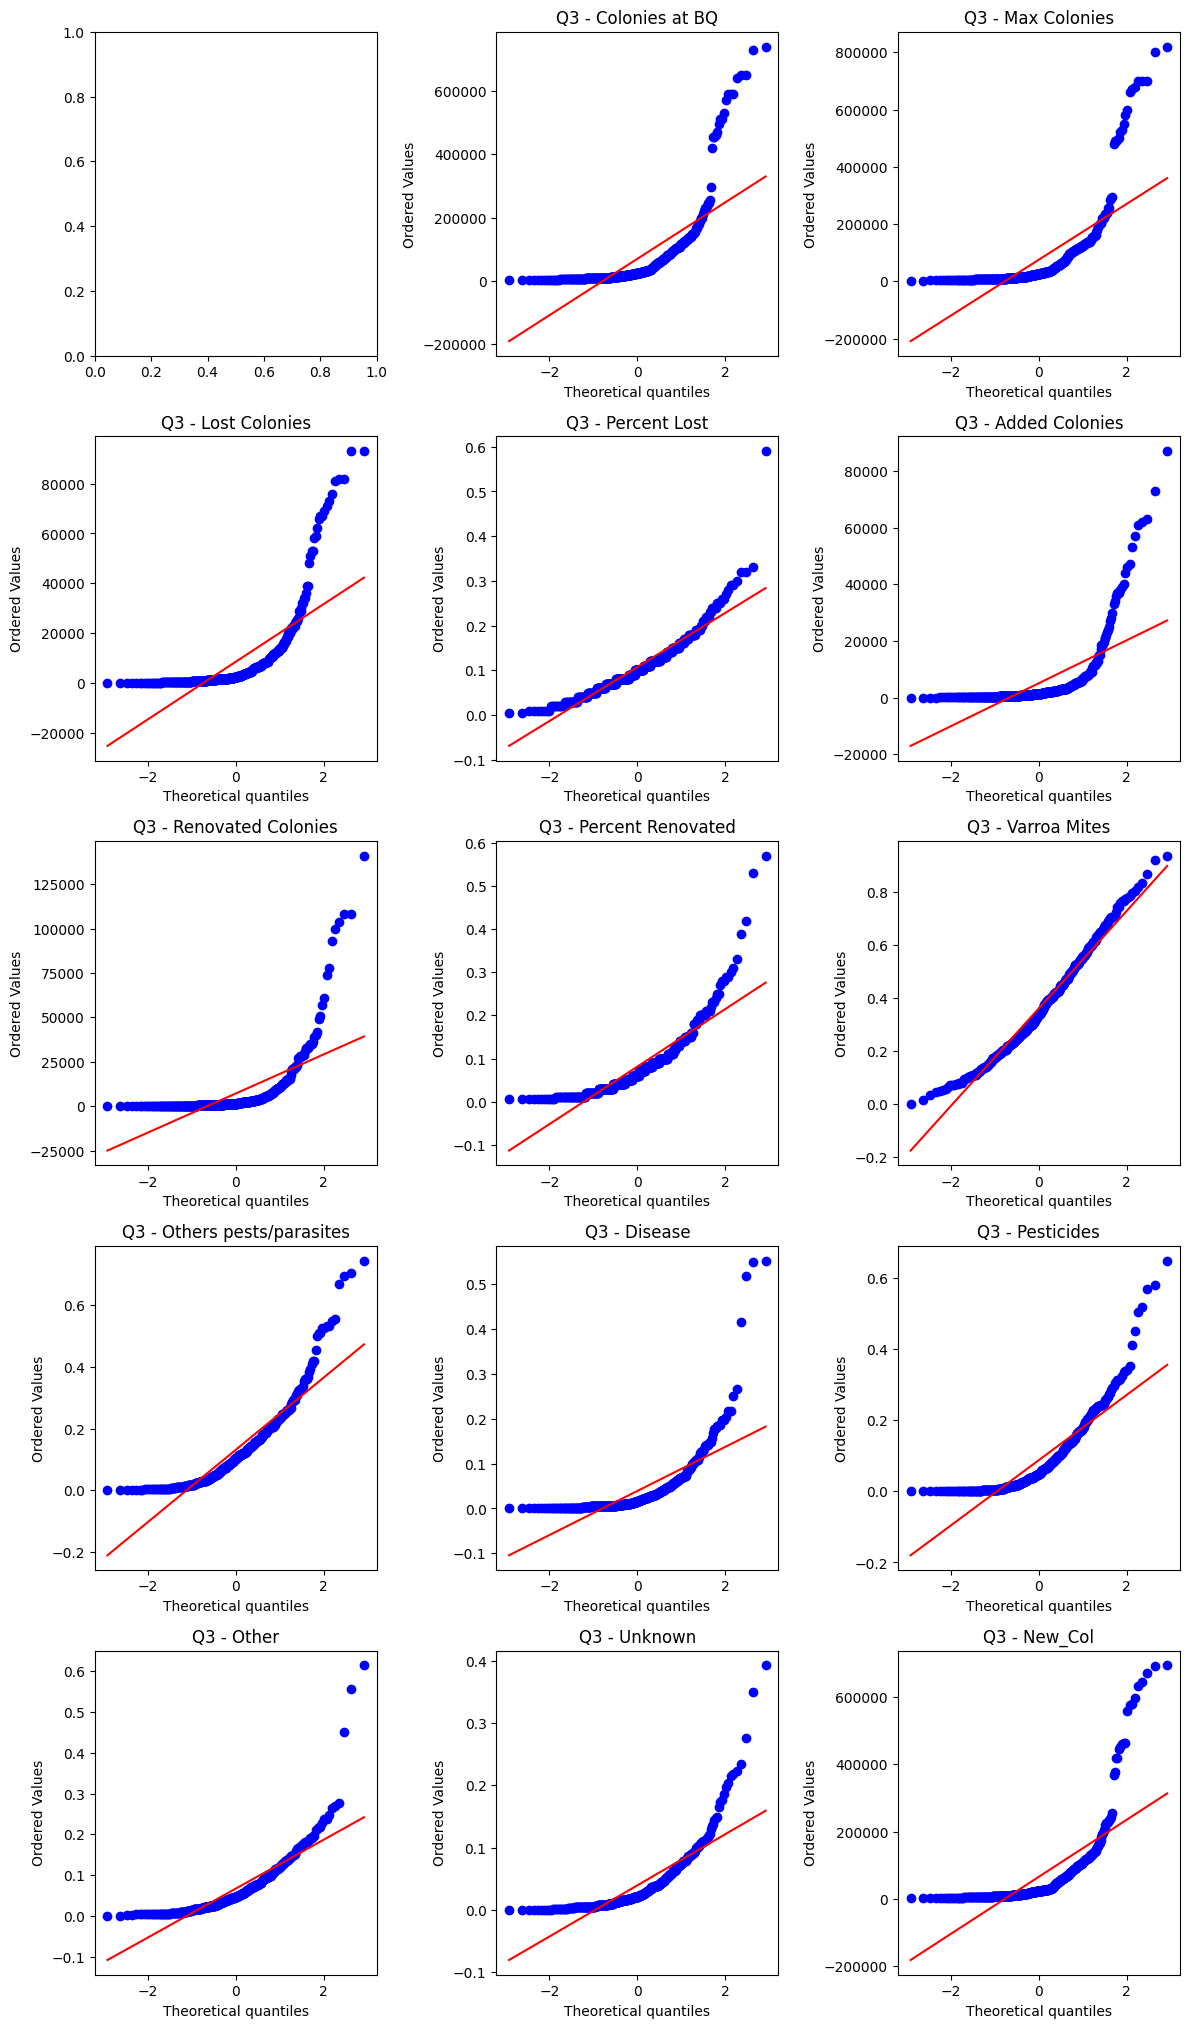

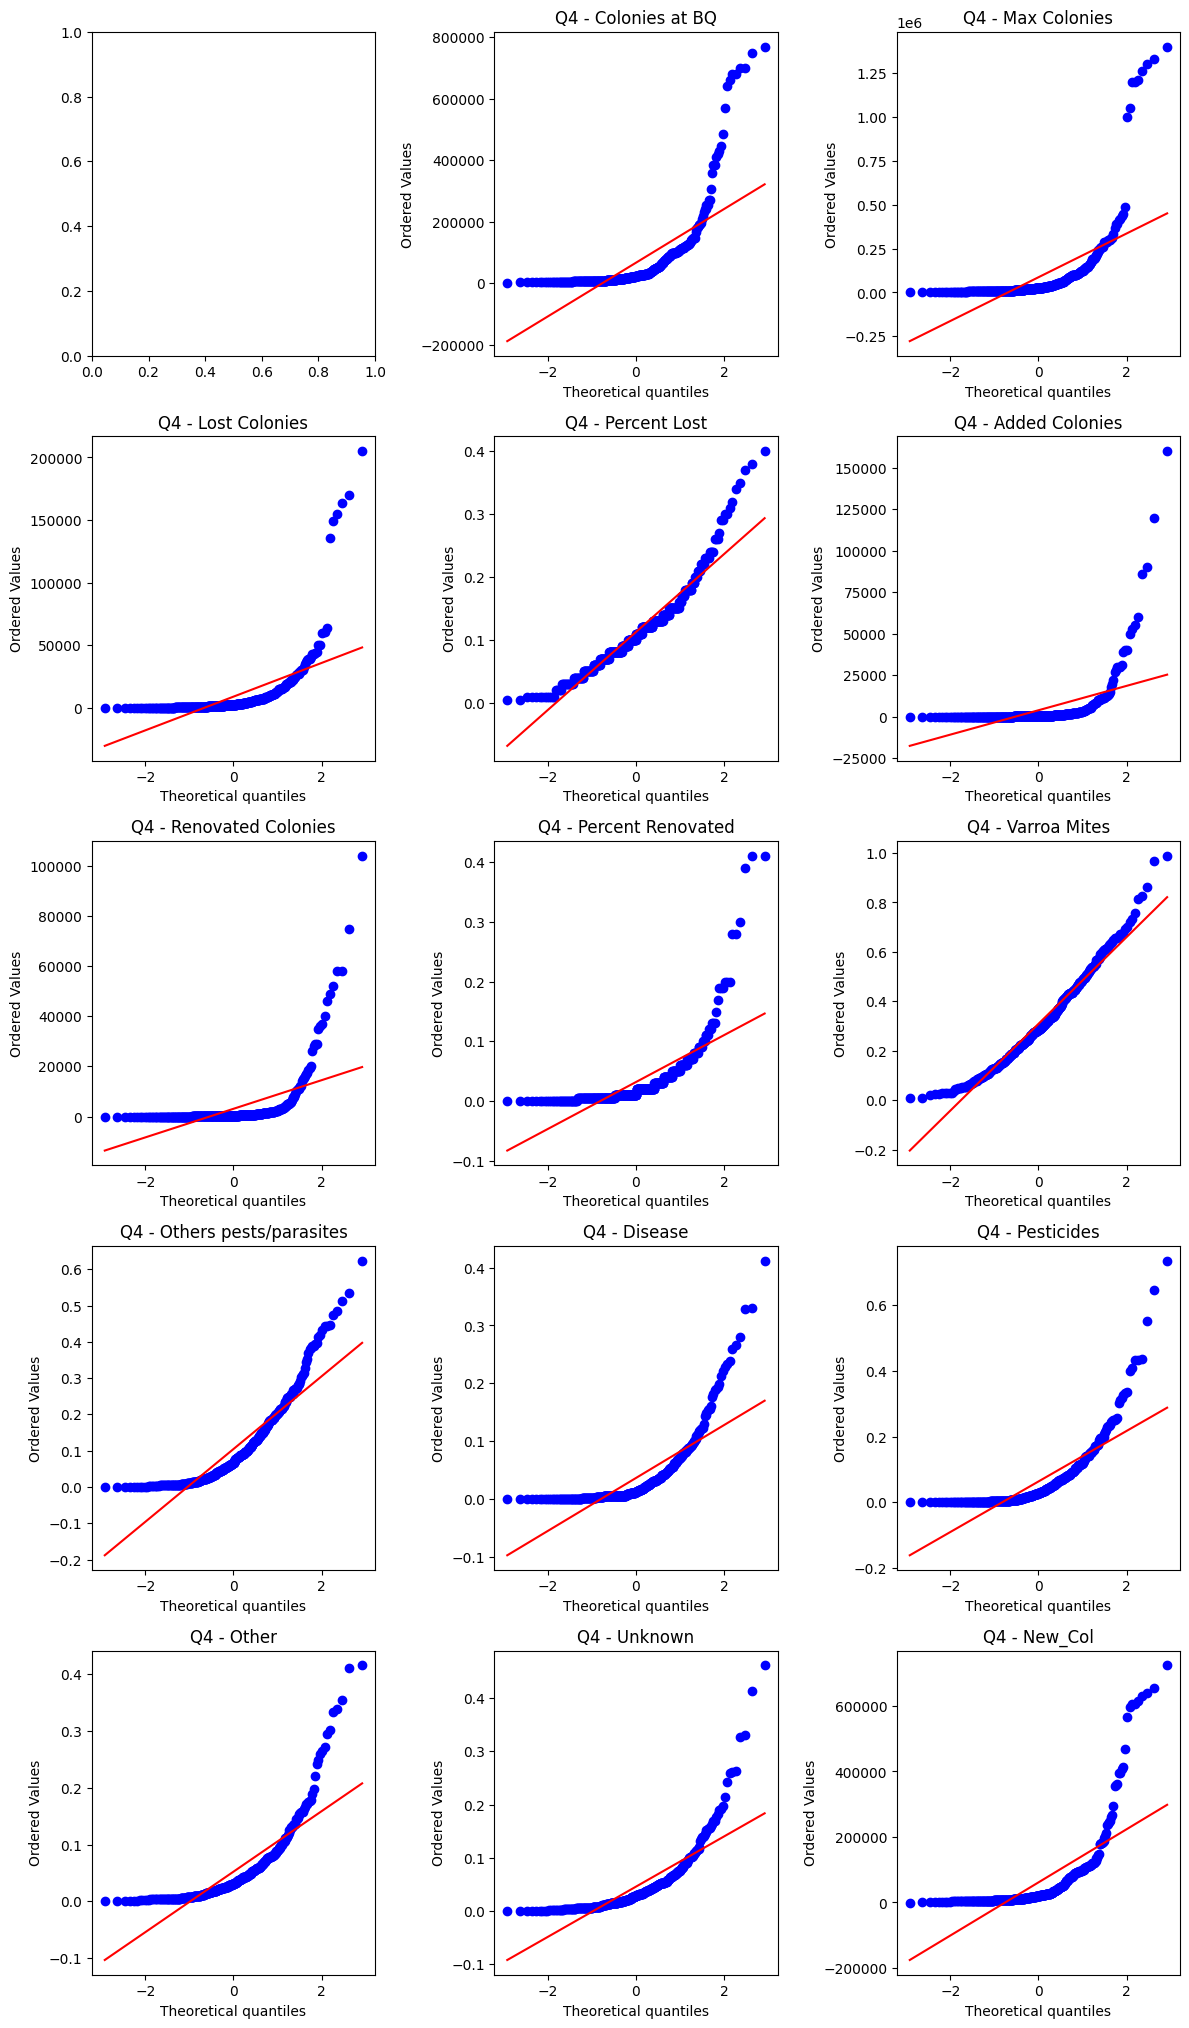

In [20]:
# qq plot

quarters = {
    "Q1": beedata[beedata['Quarter'] == 1],
    "Q2": beedata[beedata['Quarter'] == 2],
    "Q3": beedata[beedata['Quarter'] == 3],
    "Q4": beedata[beedata['Quarter'] == 4]
}

# Create QQ plots for all variables in each quarter
for quarter_name, df in quarters.items():
    num_vars = len(data)
    rows = (num_vars // 3) + 1  # Organize plots in rows of 3
    fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(data):
        if col == "Quarter":  # Skip 'Quarter' if included
            continue
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"{quarter_name} - {col}")

    for j in range(i + 1, len(axes)):  # Remove empty subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




In [21]:
# check normality

!pip install pingouin
import pingouin as pg
from scipy.stats import shapiro
from scipy.stats import shapiro


#shapiro
stat, p1 = shapiro(beedata['Varroa Mites']) #Shapiro-Wilkes test for Varroa Mites
print("Shapiro-Wilk Test:", stat)
print("p-value:", p1) #p-test not normal

stat2, p2 = shapiro(beedata['New_Col']) #Shapiro test for New Colonies
print("Shapiro-Wilkd Test:", stat2)
print("p-value:", p2)#p-value no normal

#print(f"Shapiro-Wilk Test: W={stat:.4f}, p-value={p1:.4f}")
#print(p1)
#stat, p2 = shapiro(beedata.csv[''])

#print(f"Shapiro-Wilk Test: W={stat:.4f}, p-value={p2:.4f}")
#print(p2)

#box m
#box_m = pg.box_m(df, dvs=['', ''], group="")
#print("Box-M Test")
#print(box_m)
#print("Assumptions are met for both")
#print("")


import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

#manova = MANOVA.from_formula(, data=beedata.csv)
#print(manova.mv_test())

Shapiro-Wilk Test: 0.9541368310422681
p-value: 3.4561728639924372e-22
Shapiro-Wilkd Test: 0.40783820977359697
p-value: 1.986590846713921e-58


MANOVA with Squared Transformation

In [22]:
#Buidling MANOVA model with Squared Transformation
# Rename the column to remove backticks and special characters
beedata = beedata.rename(columns={'Others pests/parasites': 'Other_pests_parasites'})
beedata = beedata.rename(columns={'Max Colonies': 'Max_Colonies'})
beedata = beedata.rename(columns={'Varroa Mites': 'Varroa_Mites'})
beedata = beedata.rename(columns={'Renovated Colonies': 'Renovated_Colonies'})
beedata = beedata.rename(columns={'Percent Lost': 'Percent_Lost'})

#Importing MANOVA library


from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('Max_Colonies + New_Col + Renovated_Colonies ~ Year + Quarter + I(Varroa_Mites**2) +	Other_pests_parasites + Disease	+ I(Pesticides**2) + I(Other**2) + I(Unknown**2)', data = beedata)
print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9933 3.0000 1615.0000  3.6269 0.0126
         Pillai's trace 0.0067 3.0000 1615.0000  3.6269 0.0126
 Hotelling-Lawley trace 0.0067 3.0000 1615.0000  3.6269 0.0126
    Roy's greatest root 0.0067 3.0000 1615.0000  3.6269 0.0126
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        Quarter         Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9074 9.0000 3930.6362 17.7920 0.0000
         Pillai's trace 0.0934 9.0000 4851.0000 17.3221 0.0000
 Hotelling-

In [23]:
#Using StandardScaler for MANOVA
from sklearn.preprocessing import StandardScaler
indep_var = ['Year', 'Quarter', 'Varroa_Mites', 'Other_pests_parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']
dep_var = ['Max_Colonies', 'Renovated_Colonies', 'New_Col']
scaler = StandardScaler()
dep_var_scaled = scaler.fit_transform(beedata[dep_var])
#Converts data back to a DataFrame
dep_var_scaled_df = pd.DataFrame(dep_var_scaled, columns = dep_var)
dep_var_scaled_df.head()
#Replaceing original vars with scaled
beedata_standardised = beedata.copy()
beedata_standardised [dep_var] = dep_var_scaled

MANOVA without Transformations

In [24]:
beedata_scaled = beedata[indep_var].copy()
beedata_scaled[dep_var] = dep_var_scaled_df
#Creating formula to use for MANOVA
manova_formula = 'Max_Colonies + Renovated_Colonies + New_Col ~ Year + Quarter + Varroa_Mites + Other_pests_parasites + Disease + Pesticides + Other + Unknown'

# Run MANOVA
maov = MANOVA.from_formula(manova_formula, data=beedata_scaled)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9930 3.0000 1615.0000  3.8108 0.0098
         Pillai's trace 0.0070 3.0000 1615.0000  3.8108 0.0098
 Hotelling-Lawley trace 0.0071 3.0000 1615.0000  3.8108 0.0098
    Roy's greatest root 0.0071 3.0000 1615.0000  3.8108 0.0098
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        Quarter         Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9069 9.0000 3930.6362 17.8999 0.0000
         Pillai's trace 0.0941 9.0000 4851.0000 17.4472 0.0000
 Hotelling-

MANOVA with Box-Cox Transforation

In [28]:
#Doing a BoxCox transfomation
from scipy.stats import boxcox
box_cox_dep_vars = ['Max_Colonies', 'Renovated_Colonies', 'New_Col']
box_cox_dep_vars = ['Max_Colonies', 'Renovated_Colonies', 'New_Col']
for var in box_cox_dep_vars:
  #Shifting vals that possibly are negative or 0
  min_val = beedata_standardised[var].min()
  # Modified shift to ensure all values are positive
  shift = abs(min_val) + 1e-6
  transformed, _ = boxcox(beedata_standardised[var] + shift)
  beedata_standardised[var + '_BoxCox'] = transformed

In [30]:
#Creating a new formula with BoxCox transfomation
manova_boxcox_formula = 'Max_Colonies_BoxCox + Renovated_Colonies_BoxCox + New_Col_BoxCox ~ Year + Quarter + Varroa_Mites + Other_pests_parasites + Disease + Pesticides + Other + Unknown'
manova_boxcox = MANOVA.from_formula(manova_boxcox_formula, data = beedata_standardised)
print(manova_boxcox.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9957 3.0000 1615.0000  2.3377 0.0719
          Pillai's trace 0.0043 3.0000 1615.0000  2.3377 0.0719
  Hotelling-Lawley trace 0.0043 3.0000 1615.0000  2.3377 0.0719
     Roy's greatest root 0.0043 3.0000 1615.0000  2.3377 0.0719
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Quarter         Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.7249 9.0000 3930.6362  61.7211 0.0000
         Pillai's trace 0.2775 9.0000 4851.0000  54.9452 0.

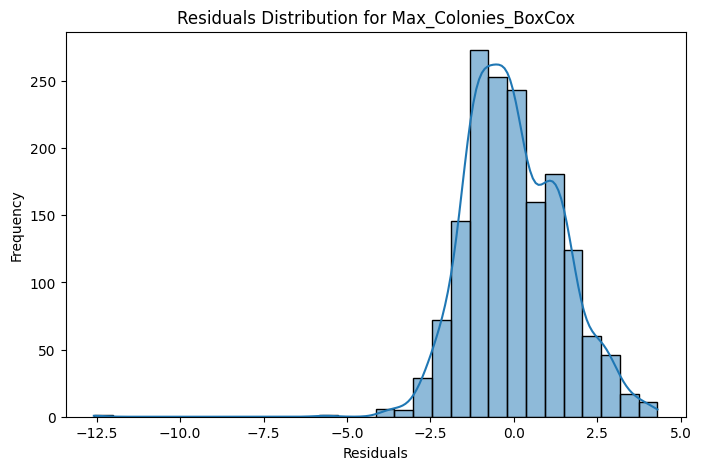

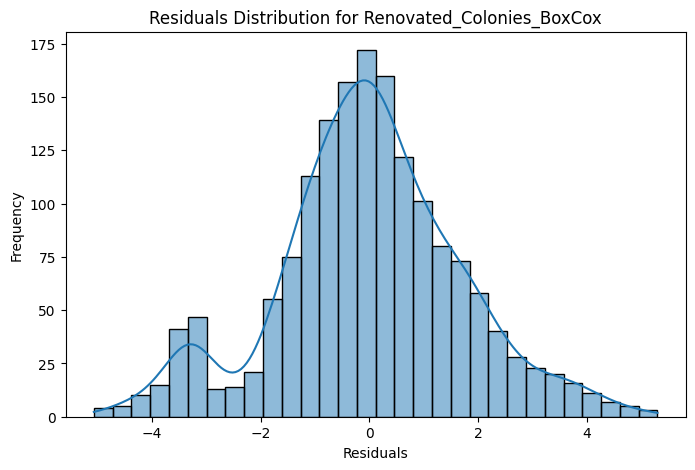

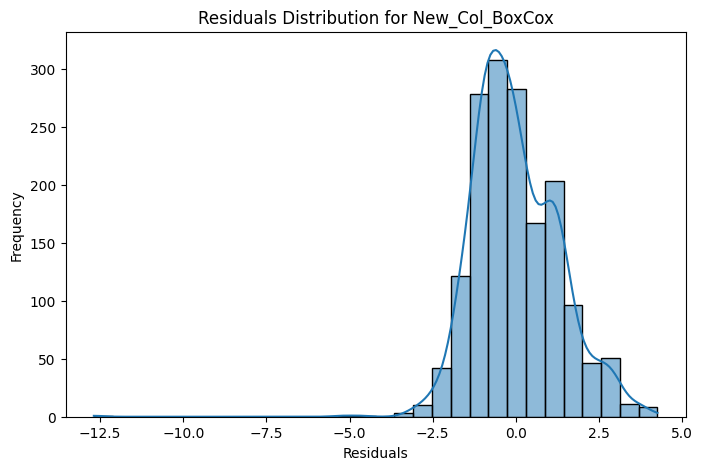

In [31]:
#Plotting Residuals
dep_vars_boxcox = ['Max_Colonies_BoxCox', 'Renovated_Colonies_BoxCox', 'New_Col_BoxCox']
indep_vars = ['Year', 'Quarter', 'Varroa_Mites', 'Other_pests_parasites',
              'Disease', 'Pesticides', 'Other', 'Unknown']

for var in dep_vars_boxcox:
    # Build design matrix
    X = beedata_standardised[indep_vars]
    X = sm.add_constant(X)
    y = beedata_standardised[var]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Get residuals
    residuals = model.resid

    # Plot residuals
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Residuals Distribution for {var}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#Exporting Results into an Excel File
excel_file = [
    {"Variable": "Intercept", "Test": "Wilk's Lambda", "Value": 0.9755, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.8108, "P-Value": 0.0000},
    {"Variable": "Quarter", "Test": "Wilk's Lambda", "Value": 0.7387, "Num DF": 9.0000, "Den DF": 3930.6362, "F-Value": 17.8999, "P-Value": 0.0000 },
    {"Variable": "Year", "Test": "Wilk's Lambda", "Value":0.9970, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 1.6193, "P-Value":0.1829},
    {"Variable": "Varroa Mites", "Test": "Wilk's Lambda", "Value":0.9811, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 10.3475, "P-Value":  0.0000},
    {"Variable": "Other_pests_Parasites", "Test": "Wilk's Lambda", "Value":0.9819, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value":  9.9181, "P-Value": 0.0000},
    {"Variable": "Disease", "Test": "Wilk's Lambda", "Value":0.9985, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value":  0.7987, "P-Value": 0.4945},
    {"Variable": "Pesticides", "Test": "Wilk's Lambda", "Value":0.9792, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 0.7987, "P-Value": 0.0000},
    {"Variable": "Other", "Test": "Wilk's Lambda", "Value":0.9944, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.0496, "P-Value": 0.0277},
    {"Variable": "Unknown", "Test": "Wilk's Lambda", "Value":0.9961, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 2.1048, "P-Value": 0.0977},
    ]
df = pd.DataFrame(excel_file)
df.to_excel("results.xlsx", index = False)

In [32]:
#Yeo-Johnson transformation for MANOVA
from sklearn.preprocessing import PowerTransformer
power_dep_vars = ['Max_Colonies', 'Renovated_Colonies', 'New_Col']
pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
YJ_transform = pt.fit_transform(beedata[power_dep_vars])
YJ_df = pd.DataFrame(YJ_transform, columns =[var + '_YJ' for var in power_dep_vars])
beedata_scaled = pd.concat([beedata, YJ_df], axis=1)

In [33]:
#Printing MANOVA formula and output
YJ_manova_formula = 'Max_Colonies_YJ + Renovated_Colonies_YJ + New_Col_YJ ~ Year + Quarter + Varroa_Mites + Other_pests_parasites + Disease + Pesticides + Other + Unknown'
yj_manova = MANOVA.from_formula(YJ_manova_formula, data = beedata_scaled)
print(yj_manova.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9950 3.0000 1615.0000  2.7233 0.0430
          Pillai's trace 0.0050 3.0000 1615.0000  2.7233 0.0430
  Hotelling-Lawley trace 0.0051 3.0000 1615.0000  2.7233 0.0430
     Roy's greatest root 0.0051 3.0000 1615.0000  2.7233 0.0430
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Quarter         Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.6957 9.0000 3930.6362  70.2281 0.0000
         Pillai's trace 0.3060 9.0000 4851.0000  61.2266 0.

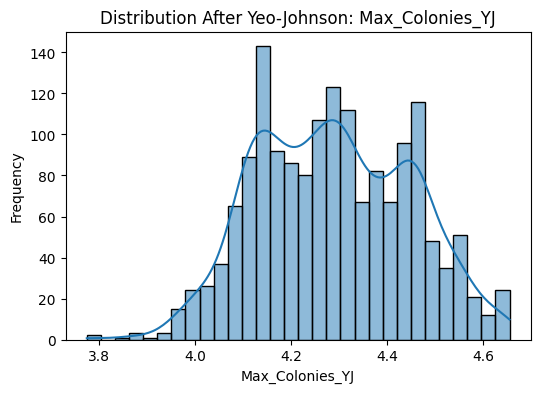

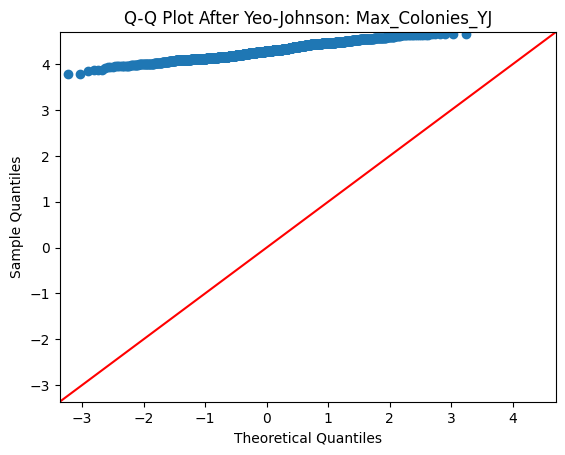

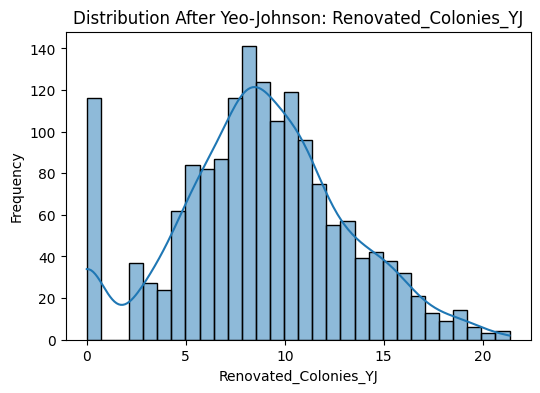

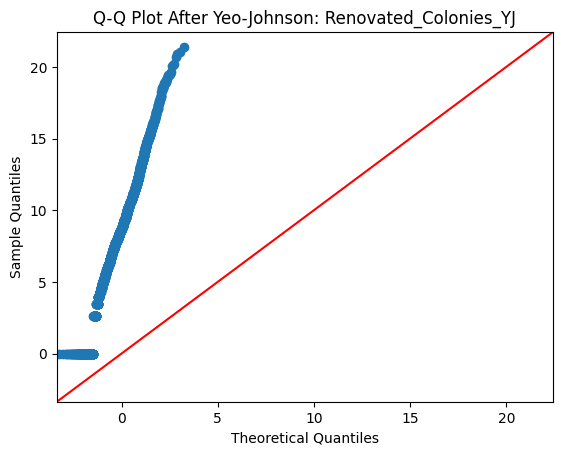

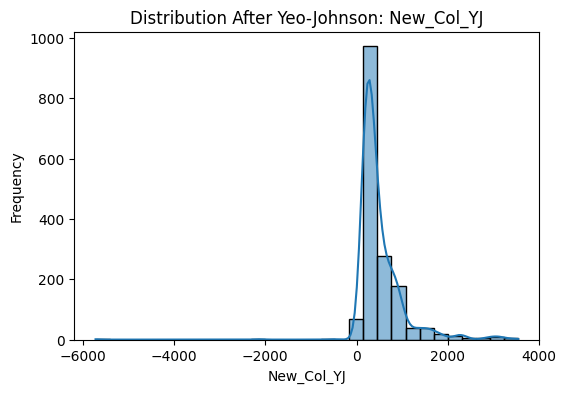

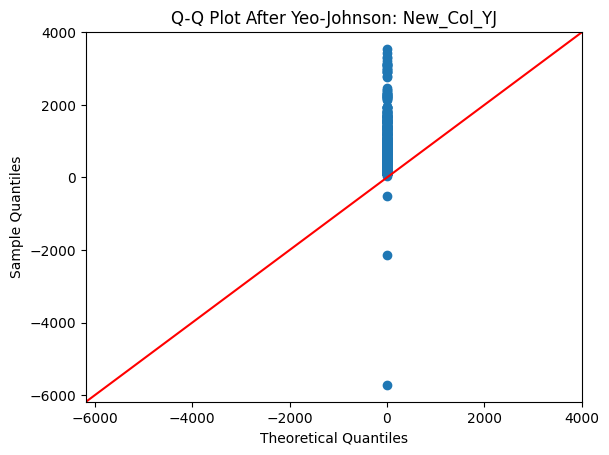

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

for var in ['Max_Colonies_YJ', 'Renovated_Colonies_YJ', 'New_Col_YJ']:
    plt.figure(figsize=(6, 4))
    sns.histplot(beedata_scaled[var], kde=True, bins=30)
    plt.title(f'Distribution After Yeo-Johnson: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    sm.qqplot(beedata_scaled[var], line='45')
    plt.title(f'Q-Q Plot After Yeo-Johnson: {var}')
    plt.show()

In [ ]:
#Exporting Results into an Excel File
excel_file = [
    {"Variable": "Intercept", "Test": "Wilk's Lambda", "Value": 0.9930, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.8108, "P-Value": 0.0098},
    {"Variable": "Quarter", "Test": "Wilk's Lambda", "Value": 0.9069, "Num DF": 9.0000, "Den DF": 3930.6362, "F-Value": 17.8999, "P-Value": 0.0000 },
    {"Variable": "Year", "Test": "Wilk's Lambda", "Value":0.9929, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.8380, "P-Value": 0.0094 },
    {"Variable": "Varroa Mites", "Test": "Wilk's Lambda", "Value":0.9940, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.2629, "P-Value":  0.0207},
    {"Variable": "Other_pests_Parasites", "Test": "Wilk's Lambda", "Value":0.9938, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.3649, "P-Value": 0.0180},
    {"Variable": "Disease", "Test": "Wilk's Lambda", "Value":0.9988, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 0.6236, "P-Value": 0.5997},
    {"Variable": "Pesticides", "Test": "Wilk's Lambda", "Value":0.9894, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 5.7672, "P-Value": 0.0006},
    {"Variable": "Other", "Test": "Wilk's Lambda", "Value":0.9928, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 3.8813, "P-Value": 0.0089},
    {"Variable": "Unknown", "Test": "Wilk's Lambda", "Value":0.9987, "Num DF": 3.0000, "Den DF": 1615.0000, "F-Value": 0.6799, "P-Value": 0.5643},
    ]
df = pd.DataFrame(excel_file)
df.to_excel("results.xlsx", index = False)

<Figure size 1000x600 with 0 Axes>

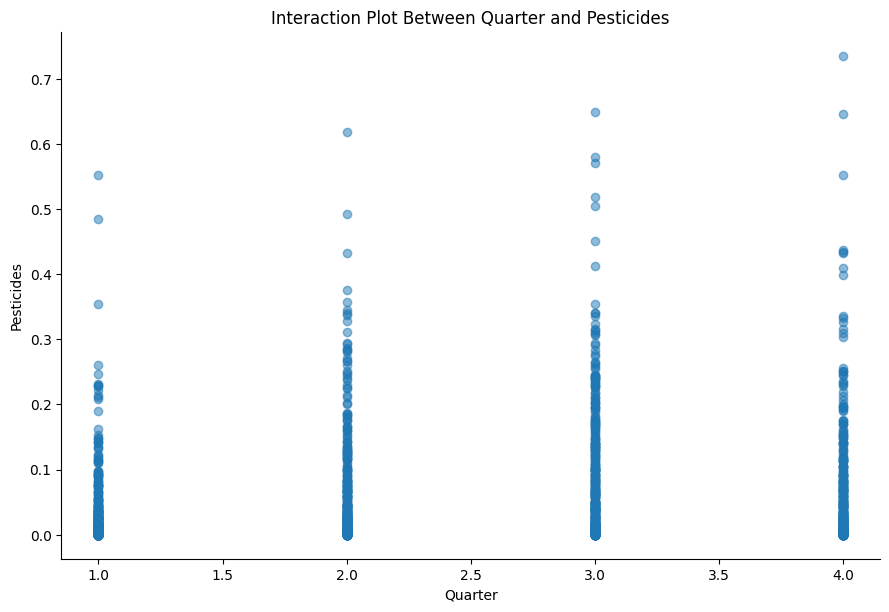

In [35]:
#Visualising the ineraction terms with Quarter and Pesticides
import seaborn as sns
beedata_standardised['Quarter'] = beedata_standardised['Quarter'].astype(int)
plt.figure(figsize = (10,6))
sns.lmplot(
    data = beedata_standardised,
    x = 'Quarter',
    y = 'Pesticides',
    height= 6,
    aspect = 1.5,
    markers = 'o',
    scatter_kws = {'alpha': 0.5}, #Adjusts opacity
    line_kws = {'color':(0,0,0,0)}, #Makes the line transparent to just get the variances
    ci = None, #removes confidene intervals
    )
plt.title('Interaction Plot Between Quarter and Pesticides')
plt.xlabel('Quarter')
plt.ylabel('Pesticides')
plt.show()


<Figure size 1000x600 with 0 Axes>

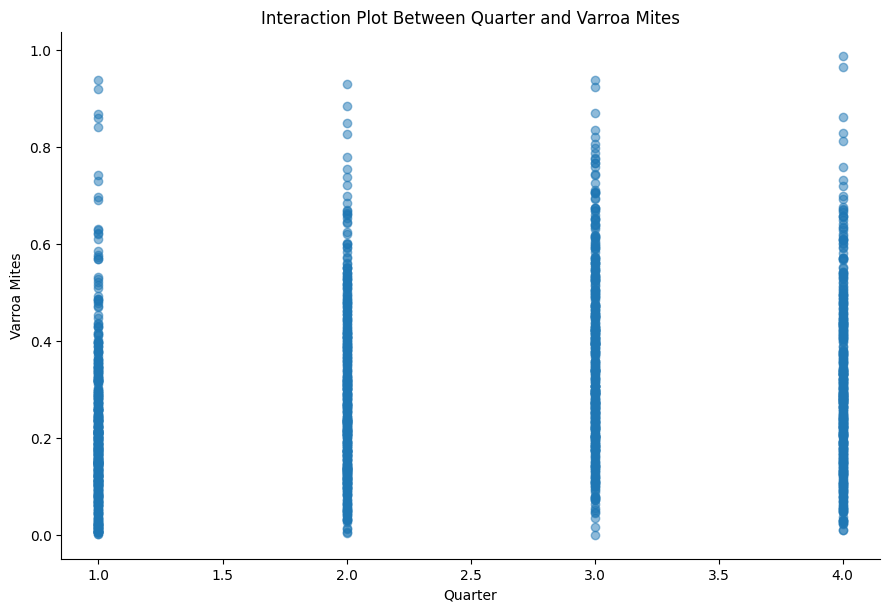

In [36]:
#Visualising the ineraction terms with Quarter and Varroa Mites
import seaborn as sns
beedata_standardised['Quarter'] = beedata_standardised['Quarter'].astype(int)
plt.figure(figsize = (10,6))
sns.lmplot(
    data = beedata_standardised,
    x = 'Quarter',
    y = 'Varroa_Mites',
    height= 6,
    aspect = 1.5,
    markers = 'o',
    scatter_kws = {'alpha': 0.5}, #Adjusts opacity
    line_kws = {'color':(0,0,0,0)}, #Makes the linear line transparent to just get variances
    ci = None, #removes confidene intervals
    )
plt.title('Interaction Plot Between Quarter and Varroa Mites')
plt.xlabel('Quarter')
plt.ylabel('Varroa Mites')
plt.show()

<Figure size 1000x600 with 0 Axes>

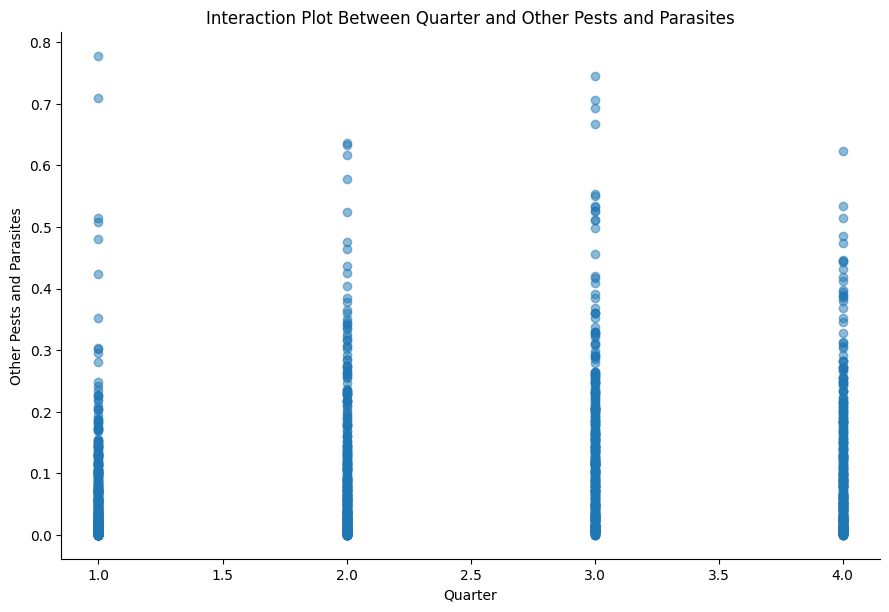

In [37]:
#Visualising the ineraction terms with Quarter and Other_pests_parasites
import seaborn as sns
beedata_standardised['Quarter'] = beedata_standardised['Quarter'].astype(int)
plt.figure(figsize = (10,6))
sns.lmplot(
    data = beedata_standardised,
    x = 'Quarter',
    y = 'Other_pests_parasites',
    height= 6,
    aspect = 1.5,
    markers = 'o',
    scatter_kws = {'alpha': 0.5}, #Adjusts opacity
    line_kws = {'color':(0,0,0,0)}, #Makes the line transparent to just get the variances
    ci = None, #removes confidene intervals
    )
plt.title('Interaction Plot Between Quarter and Other Pests and Parasites')
plt.xlabel('Quarter')
plt.ylabel('Other Pests and Parasites')
plt.show()

<Figure size 1000x600 with 0 Axes>

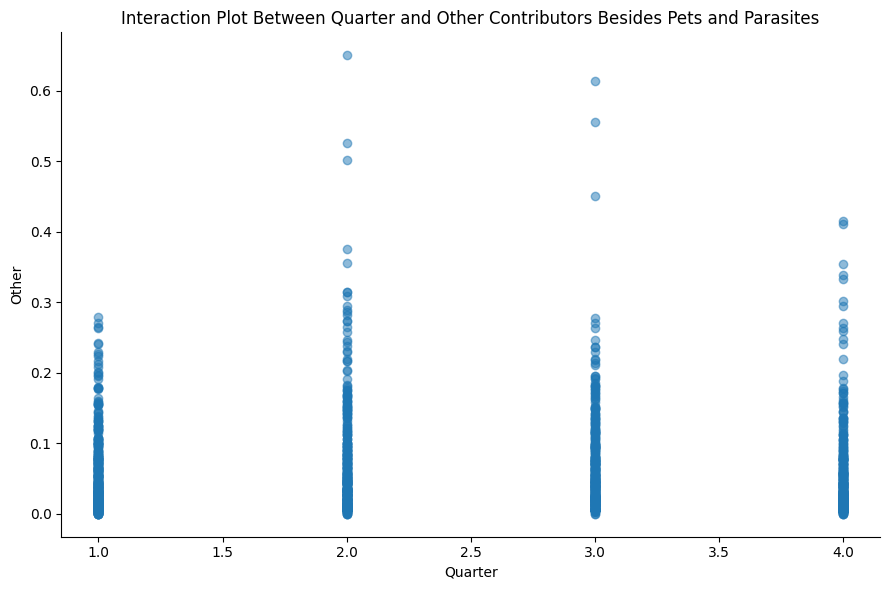

In [38]:
#Visualising the ineraction terms with Quarter and Other
import seaborn as sns
beedata_standardised['Quarter'] = beedata_standardised['Quarter'].astype(int)
plt.figure(figsize = (10,6))
sns.lmplot(
    data = beedata_standardised,
    x = 'Quarter',
    y = 'Other',
    height= 6,
    aspect = 1.5,
    markers = 'o',
    scatter_kws = {'alpha': 0.5}, #Adjusts opacity
    line_kws = {'color':(0,0,0,0)}, #Makes the line transparent to just get the variances
    ci = None, #removes confidene intervals
    )
plt.title('Interaction Plot Between Quarter and Other Contributors Besides Pets and Parasites')
plt.tight_layout()
plt.xlabel('Quarter')
plt.ylabel('Other')
plt.show()

### MANOVA without any Transformations

In [39]:
#Creating Standardised Manova
from statsmodels.multivariate.manova import MANOVA
#Creating the MANOVA formula
manova_form = 'Max_Colonies + New_Col ~ Year + Quarter + Varroa_Mites + Other_pests_parasites + Disease + Pesticides + Other + Unknown'
manova1 = MANOVA.from_formula(manova_form, data = beedata_scaled)
print(manova1.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9994 2.0000 1616.0000  0.5005 0.6063
         Pillai's trace 0.0006 2.0000 1616.0000  0.5005 0.6063
 Hotelling-Lawley trace 0.0006 2.0000 1616.0000  0.5005 0.6063
    Roy's greatest root 0.0006 2.0000 1616.0000  0.5005 0.6063
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        Quarter         Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9871 6.0000 3232.0000  3.5095 0.0018
         Pillai's trace 0.0129 6.0000 3234.0000  3.5051 0.0019
 Hotelling-

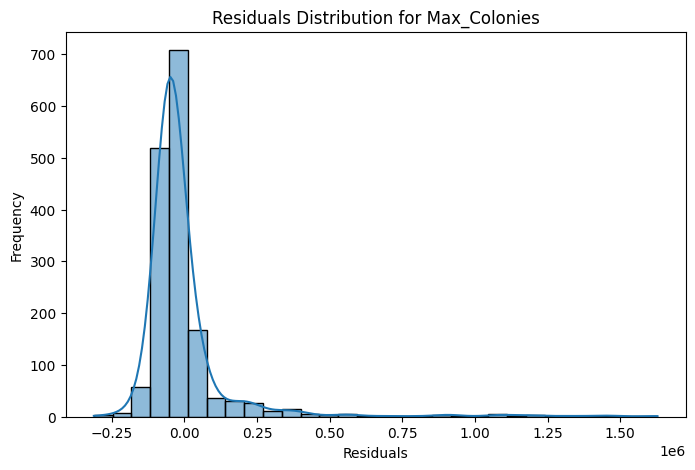

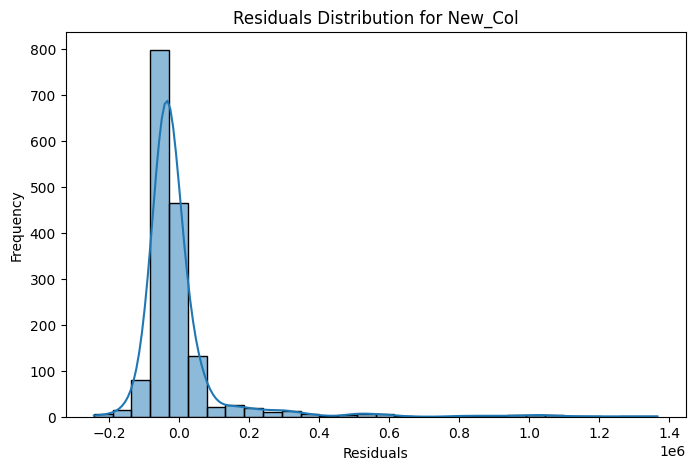

In [40]:
#Plotting Residuals for scaled without Renovated Colonies
dep_vars_boxcox = ['Max_Colonies', 'New_Col']
indep_vars = ['Year', 'Quarter', 'Varroa_Mites', 'Other_pests_parasites',
              'Disease', 'Pesticides', 'Other', 'Unknown']

for var in dep_vars_boxcox:
    # Build design matrix
    X = beedata_scaled[indep_vars]
    X = sm.add_constant(X)
    y = beedata_scaled[var]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Get residuals
    residuals = model.resid

    # Plot residuals
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Residuals Distribution for {var}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

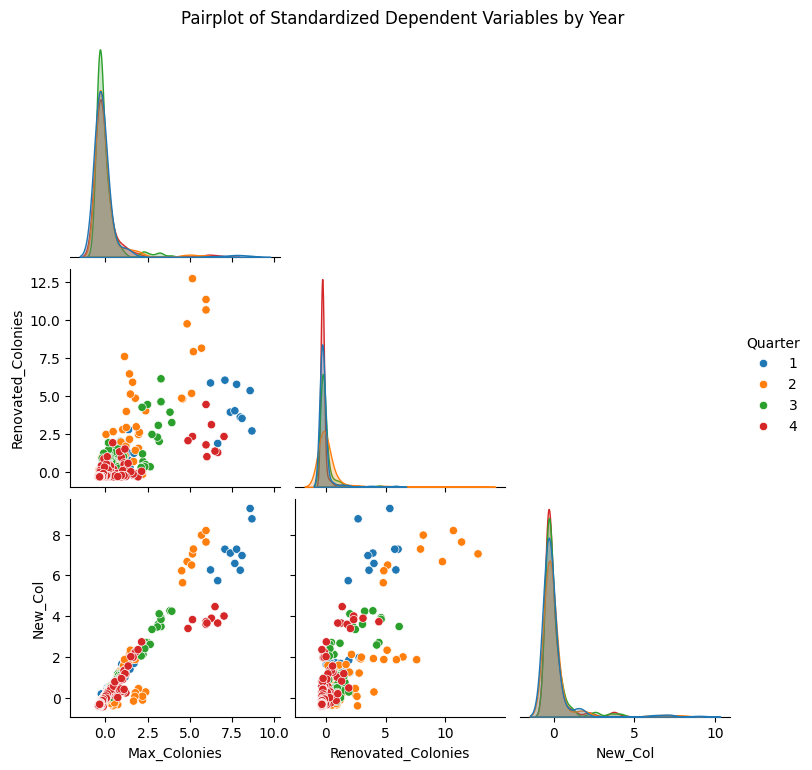

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge scaled dependent variables with Year (or other grouping var)
pairplot_data = pd.concat([dep_var_scaled_df, beedata['Quarter']], axis=1)

# Convert Year to string for better color separation
pairplot_data['Quarter'] = pairplot_data['Quarter'].astype(str)

# Create pairplot
sns.pairplot(pairplot_data, hue='Quarter', corner=True, diag_kind='kde', palette='tab10')
plt.suptitle("Pairplot of Standardized Dependent Variables by Year", y=1.02)
plt.show()


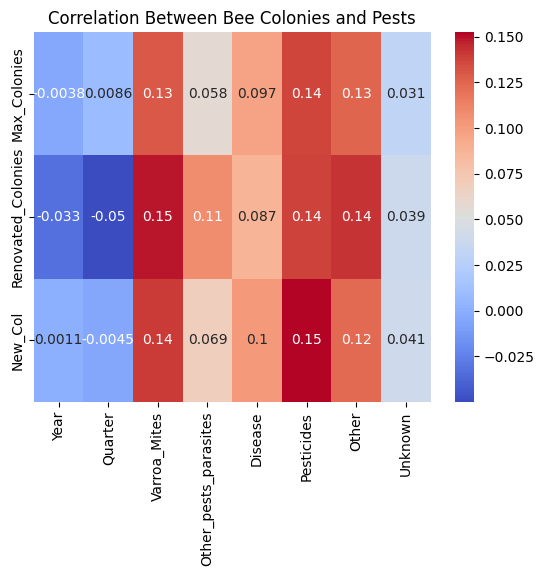

In [42]:
#response = ['Max_Colonies', 'New_Col', 'Renovated_Colonies']
#explained = ['Quarter','Varroa_Mites', 'Other_pests_parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']
corr_matrix = beedata[dep_var + indep_var].corr().loc[dep_var, indep_var]
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Between Bee Colonies and Pests')
plt.show()

In [43]:
#Getting MANOVA Residuals
import statsmodels.api as sm

residuals = pd.DataFrame()
for col in dep_var:
  model = sm.OLS(beedata_standardised[col], sm.add_constant(beedata_standardised[indep_var])).fit()
  residuals[col + '_resid'] = model.resid

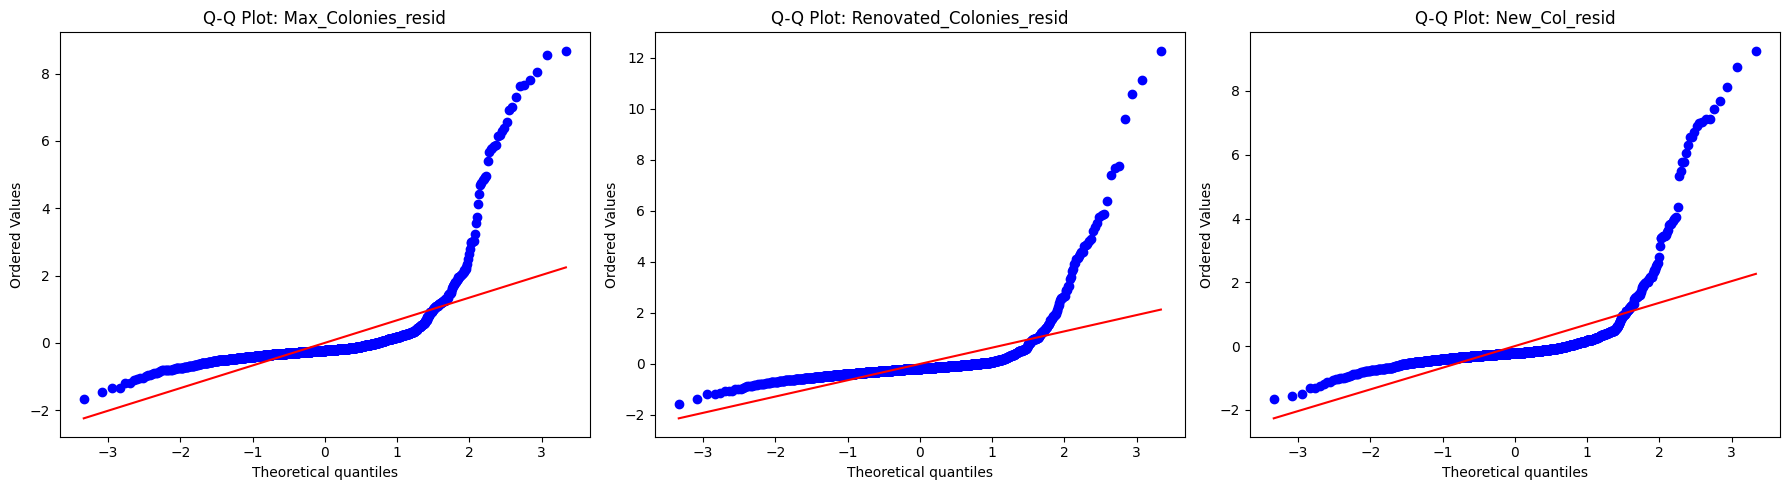

In [44]:
#QQ-plot to look at normality
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(residuals.columns):
  stats.probplot(residuals[col], dist="norm", plot=axes[i])
  axes[i].set_title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()


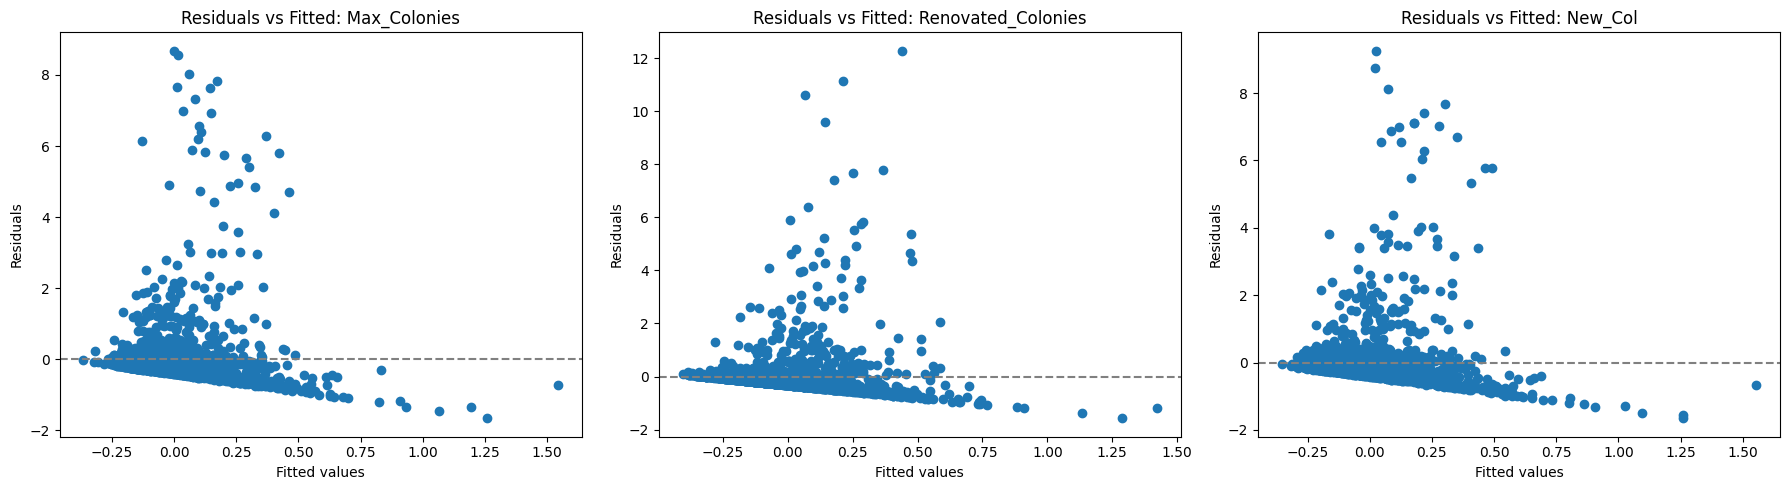

In [45]:
#Plotting residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(dep_var):
    model = sm.OLS(beedata_standardised[col], sm.add_constant(beedata_standardised[indep_var])).fit()
    fitted = model.fittedvalues
    resid = model.resid
    axes[i].scatter(fitted, resid)
    axes[i].axhline(0, linestyle='--', color='gray')
    axes[i].set_title(f'Residuals vs Fitted: {col}')
    axes[i].set_xlabel('Fitted values')
    axes[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


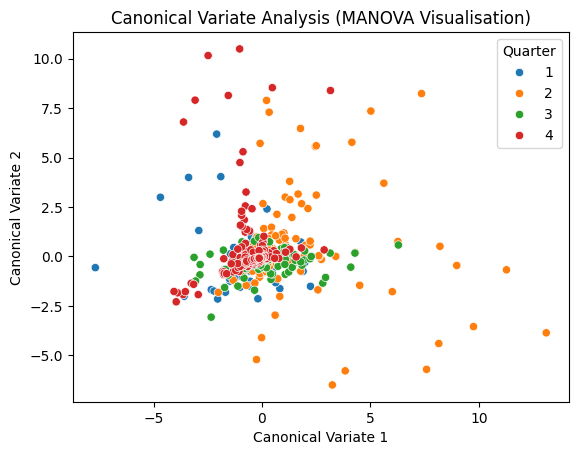

In [46]:
#Visualising model using Canonical Values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Dependent Variables
X = beedata_standardised[['Max_Colonies', 'New_Col', 'Renovated_Colonies']]
#Independent Variable, looking at Year as a categorical data
y = beedata_standardised['Quarter'].astype(str)

#Fitting Linear Discriminat Analysis (LDA)
lda1 = LDA(n_components=2)
X_lda1 = lda1.fit_transform(X, y)

#Plotting data
lda_df1 = pd.DataFrame(X_lda1, columns = ['CV1', 'CV2'])
lda_df1['Quarter'] = y
sns.scatterplot(x = 'CV1', y = 'CV2', hue = 'Quarter', data = lda_df1, palette = 'tab10')
plt.title('Canonical Variate Analysis (MANOVA Visualisation)')
plt.xlabel('Canonical Variate 1')
plt.ylabel('Canonical Variate 2')
plt.legend(title = 'Quarter')
plt.show()


In [47]:
#MANOVA using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = ['Year', 'Quarter', 'Varroa_Mites', 'Other_pests_parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']
Y = ['Max_Colonies', 'Renovated_Colonies', 'New_Col'] #Dependent vars going to be scaled
beedata_scaled = beedata[X].copy()
beedata_scaled[Y] = scaler.fit_transform(beedata[Y])




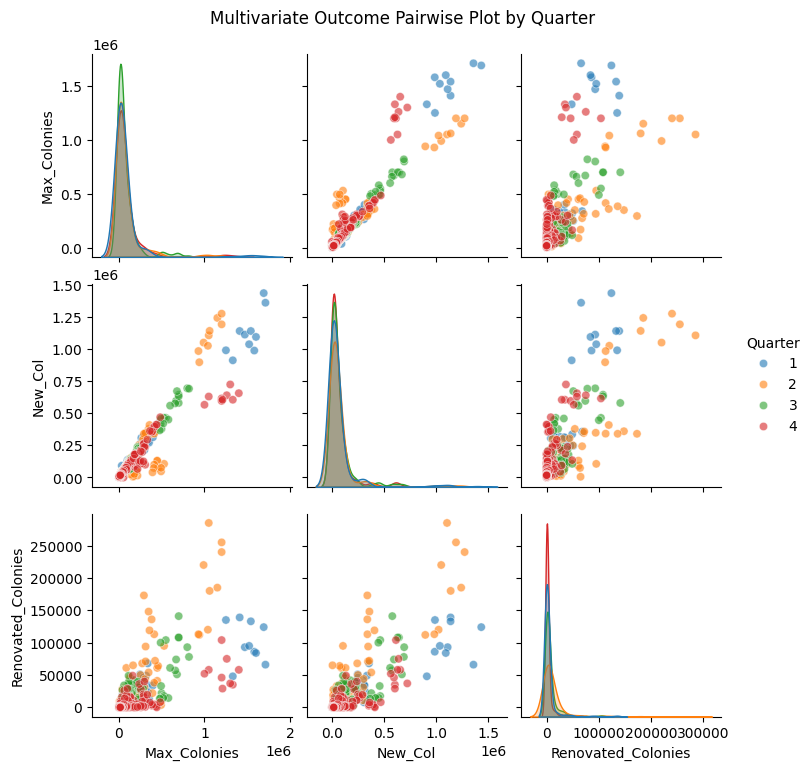

In [48]:
#Creating a pariplot for multiple variables coloured by quarters
sns.pairplot(beedata, vars= ['Max_Colonies', 'New_Col', 'Renovated_Colonies',], hue = 'Quarter', palette = 'tab10', plot_kws={'alpha': 0.6})
plt.suptitle('Multivariate Outcome Pairwise Plot by Quarter', y = 1.02)
plt.show()


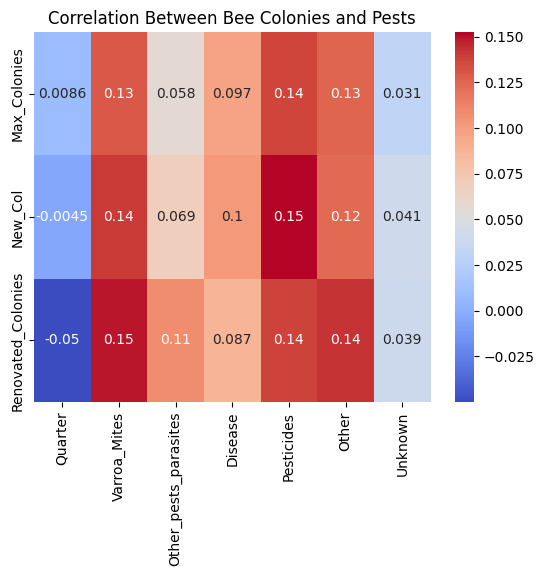

In [49]:
#Heatmap between the response vars and explained vars
response = ['Max_Colonies', 'New_Col', 'Renovated_Colonies']
explained = ['Quarter','Varroa_Mites', 'Other_pests_parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']
corr_matrix = beedata[response + explained].corr().loc[response, explained]
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Between Bee Colonies and Pests')
plt.show()

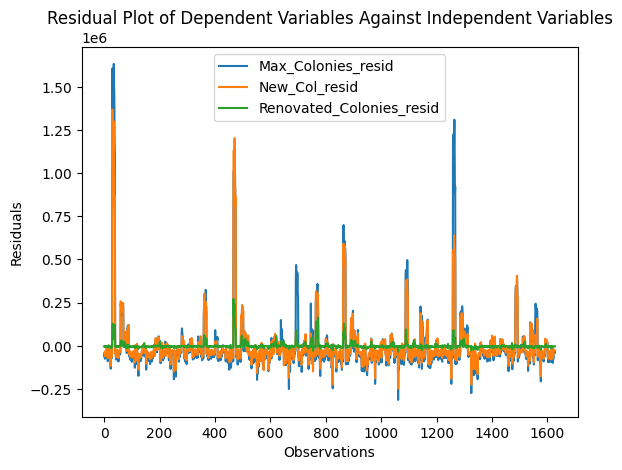

In [50]:
#Plottine Residuals
import statsmodels.api as sm
#Plotting residuals for the dependent variables
residuals = pd.DataFrame()
for y_var in ['Max_Colonies', 'New_Col', 'Renovated_Colonies']:
  X = beedata[['Varroa_Mites', 'Other_pests_parasites', 'Disease', 'Pesticides', 'Other', 'Unknown']]
  X = sm.add_constant(X)
  model = sm.OLS(beedata[y_var], X)
  results = model.fit()
  residuals[y_var +'_resid'] = results.resid

#Plotting
residuals.plot(title = "Residual Plot of Dependent Variables Against Independent Variables")
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

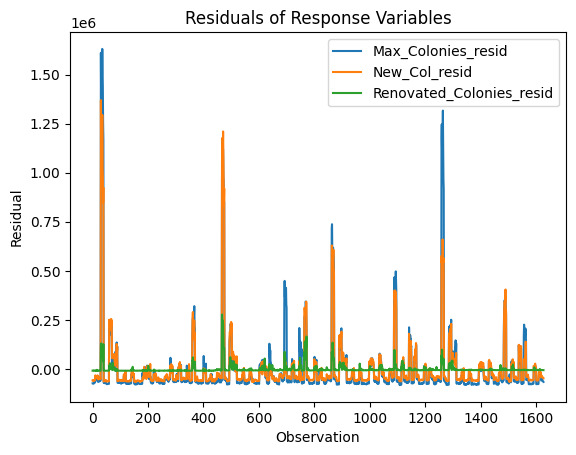

In [51]:
residuals = pd.DataFrame()
for y_var in ['Max_Colonies', 'New_Col', 'Renovated_Colonies']:
  model = sm.OLS(beedata[y_var], sm.add_constant(beedata[['Quarter']])).fit()
  residuals[y_var + '_resid'] = model.resid

# Plot residuals
residuals.plot(title='Residuals of Response Variables')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

In [52]:
# Perform Mardia's test for multivariate normality
numeric_data = beedata.select_dtypes(include=np.number)
result = pg.multivariate_normality(numeric_data, alpha=0.05)

print("Mardia's Test Result:")
print(result)

Mardia's Test Result:
HZResults(hz=6512, pval=np.float64(0.0), normal=False)


Creating a PCA

In [53]:
#Dropping Quarter, State, and year
features = beedata.drop(columns = ['Quarter' , 'State', 'Year'])
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fitting data
features_scaled = scaler.fit_transform(features)
from sklearn.decomposition import PCA
#Performing PCA
pca = PCA(n_components = 2)
pca_transform = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(pca_transform, columns = ['PC1', 'PC2'])
pca_df['Quarter'] = beedata['Quarter']

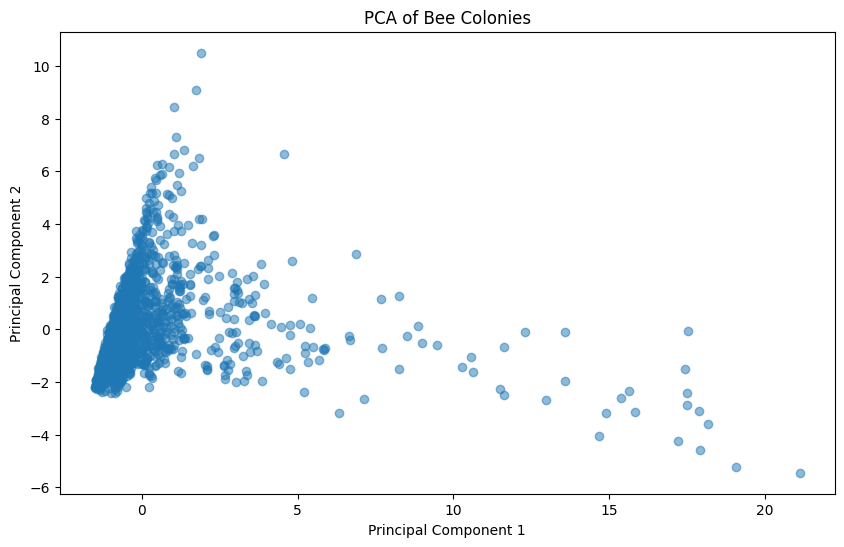

In [54]:
#Visualising PCA using scatterplot
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha = 0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Bee Colonies')
plt.show()

In [55]:
#interpreting results
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = features.columns)
print(loadings)

                            PC1       PC2
Colonies at BQ         0.408919 -0.112820
Max_Colonies           0.401452 -0.121889
Lost Colonies          0.391896 -0.084296
Percent_Lost           0.035412  0.286424
Added Colonies         0.385168 -0.095093
Renovated_Colonies     0.365920 -0.066744
Percent Renovated      0.098707  0.118385
Varroa_Mites           0.118842  0.441070
Other_pests_parasites  0.086320  0.425258
Disease                0.084451  0.326620
Pesticides             0.116377  0.394579
Other                  0.105114  0.357972
Unknown                0.052241  0.276673
New_Col                0.410806 -0.115351


Plotting the loadings Biplot

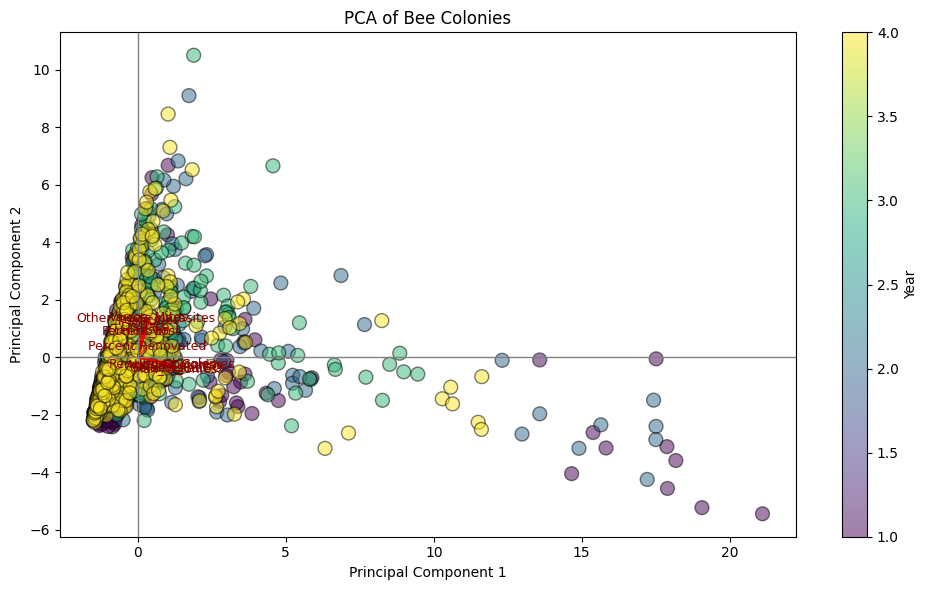

In [56]:
#Trial PCA. DO NOT USE IN PRESENTATION
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c = pca_df['Quarter'], cmap = 'viridis', s = 100, alpha = 0.5, edgecolors= 'k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Bee Colonies')


# Plot the feature vectors (loadings)
for feature in loadings.index:
    x = loadings.loc[feature, 'PC1']
    y = loadings.loc[feature, 'PC2']
    plt.arrow(0, 0, x*3, y*3, color='red', alpha=0.6, head_width=0.02)
    plt.text(x*3.2, y*3.2, feature, color='darkred', ha='center', va='center', fontsize=9)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.colorbar(label='Year')
plt.tight_layout()
plt.show()

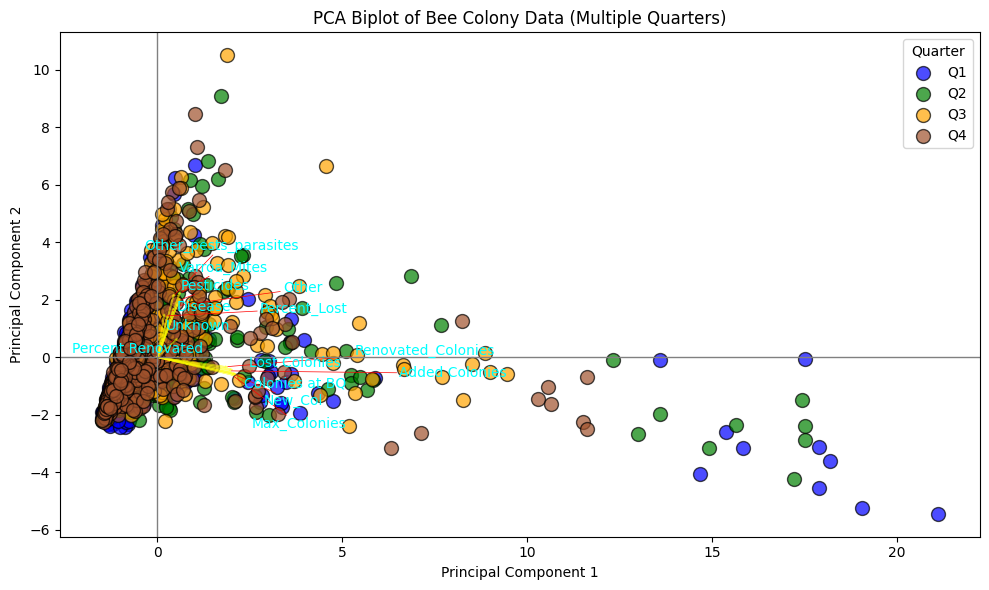

In [57]:
plt.figure(figsize=(10, 6))
colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'sienna'}
for quarter in pca_df['Quarter'].unique():
    subset = pca_df[pca_df['Quarter'] == quarter]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[quarter], label=f'Q{quarter}', s=100, alpha=0.7, edgecolor='k')

# Arrows for features
arrow_scale = 5
label_offset = 0.2  # tweak this as needed
#ChatGPT.com for adjusting the text
!pip install adjustText
from adjustText import adjust_text

# Plot the feature vectors (loadings)
texts = []

for feature in loadings.index:
    x = loadings.loc[feature, 'PC1'] * arrow_scale
    y = loadings.loc[feature, 'PC2'] * arrow_scale
    plt.arrow(0, 0, x, y, color='yellow', alpha=0.5, head_width=0.05)
    texts.append(plt.text(x, y, feature, color='cyan', fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0.5))



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot of Bee Colony Data (Multiple Quarters)')
plt.legend(title='Quarter')
plt.grid(False)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.tight_layout()
plt.show()